TIME SERIES FORECASTING USING ARIMA METHOD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

STEP 1: VISUALIZE THE DATA

In [2]:
df=pd.read_csv('Miles_Traveled.csv')

In [3]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [4]:
df.tail()

,DATE,TRFVOLUSM227NFWA
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [5]:
df.columns=['Month','Traveled']
df.head()

,Month,Traveled
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [6]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()

,Traveled
Month,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [7]:
df.describe()

,Traveled
count,588.000000
mean,190420.380952
std,57795.538934
min,77442.000000
25%,133579.000000
50%,196797.500000
75%,243211.500000
max,288145.000000


<Axes: xlabel='Month'>

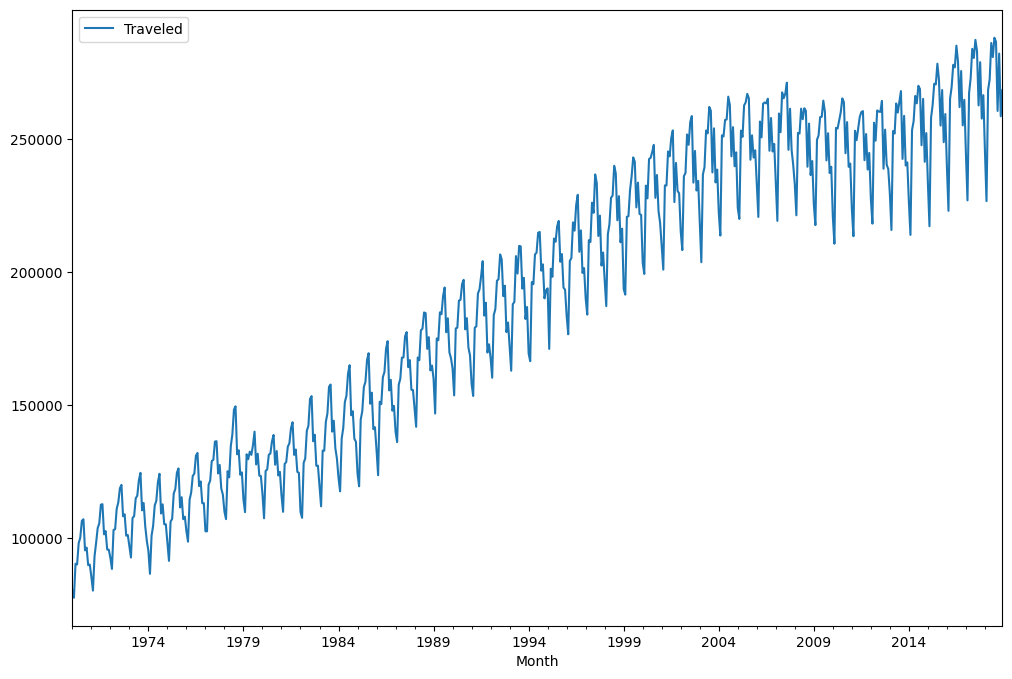

In [8]:
df.plot(figsize=(12,8))

STEP 2: TESTING FOR STATIONARITY

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
test_result = adfuller(df['Traveled'])

In [11]:
def adfuller_test(Traveled):
    result = adfuller(Traveled)
    labels = ['ADF Test Statistic ','P-value','#lags used','Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<= 0.05:
        print("Strong evidence against the null hypothesis(HO), reject the null hypothesis,Data has no unit root is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [12]:
adfuller_test(df['Traveled'])

ADF Test Statistic  : -1.2425483519561622
P-value : 0.6550300653192358
#lags used : 17
Number of Observation Used : 570
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


STEP 3: PERFORM DIFFERENCING

In [13]:
df['Traveled First Difference'] = df['Traveled'] - df['Traveled'].shift(1)

In [14]:
df['Traveled'].shift(1)

Month
1970-01-01         NaN
1970-02-01     80173.0
1970-03-01     77442.0
1970-04-01     90223.0
1970-05-01     89956.0
                ...   
2018-08-01    288145.0
2018-09-01    286608.0
2018-10-01    260595.0
2018-11-01    282174.0
2018-12-01    258590.0
Name: Traveled, Length: 588, dtype: float64

In [15]:
df['Seasonal First Difference'] = df['Traveled'] - df['Traveled'].shift(12)

In [16]:
df.head(14)

,Traveled,Traveled First Difference,Seasonal First Difference
Month,,,
1970-01-01,80173.0,NaN,NaN
1970-02-01,77442.0,-2731.0,NaN
1970-03-01,90223.0,12781.0,NaN
1970-04-01,89956.0,-267.0,NaN
1970-05-01,97972.0,8016.0,NaN
1970-06-01,100035.0,2063.0,NaN
1970-07-01,106392.0,6357.0,NaN
1970-08-01,106969.0,577.0,NaN
1970-09-01,95254.0,-11715.0,NaN


In [17]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic  : -3.6229046613789935
P-value : 0.005337939066000589
#lags used : 15
Number of Observation Used : 560
Strong evidence against the null hypothesis(HO), reject the null hypothesis,Data has no unit root is stationary


<Axes: xlabel='Month'>

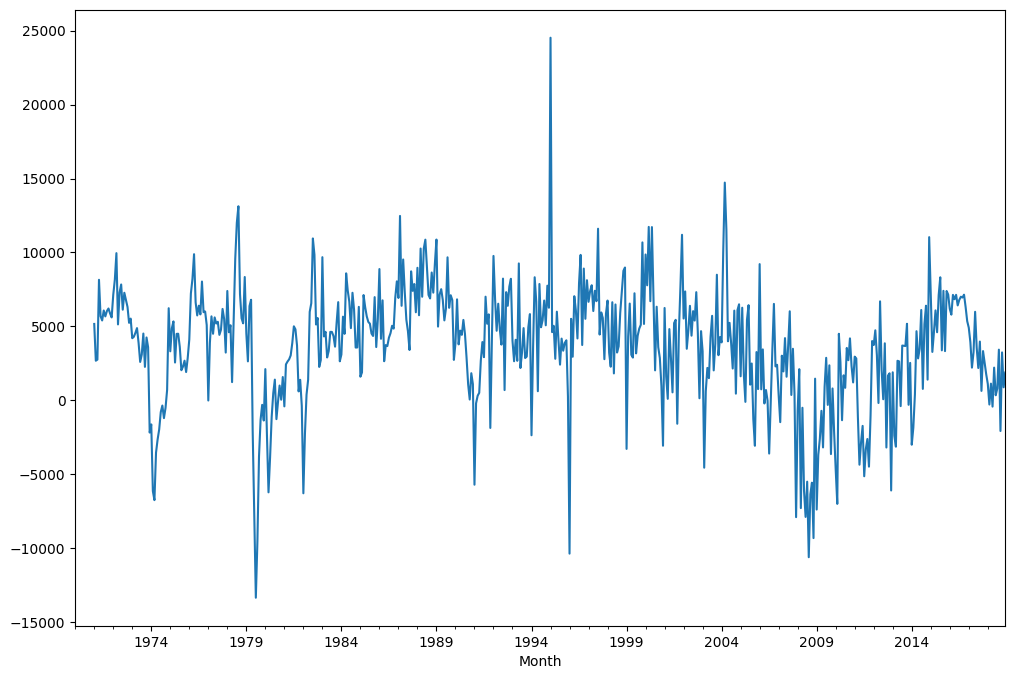

In [18]:
df['Seasonal First Difference'].plot(figsize=(12,8))

STEP 4: PLOT CORRELATION AND AUTOCORRELATION

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

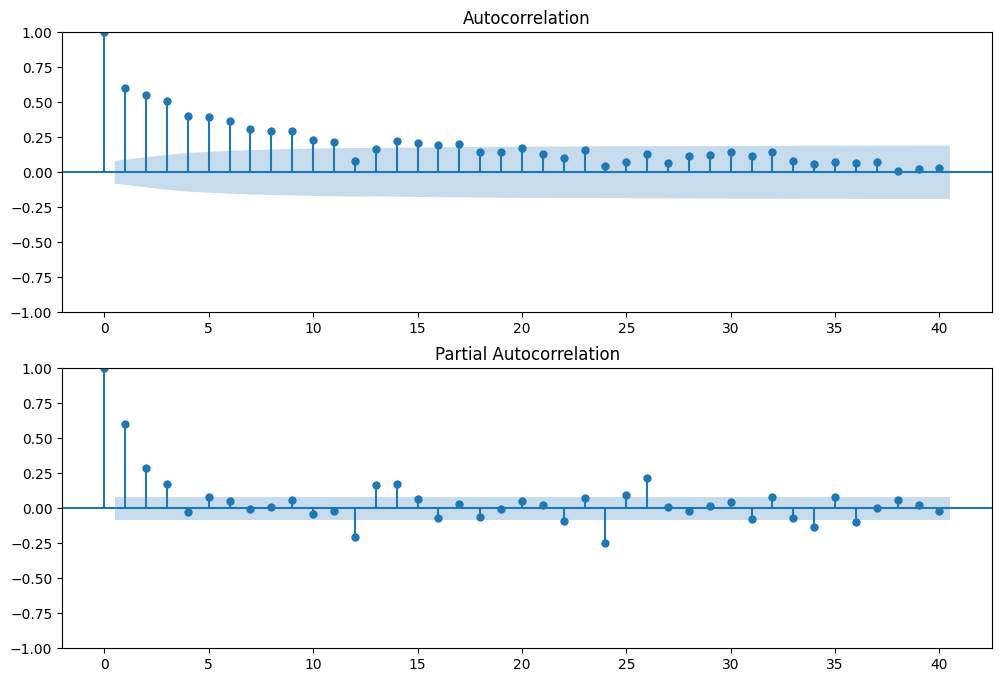

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

STEP 5 : CONSTRUCT THE ARIMA OR SEASONAL ARIMA BASED ON THE DATA

In [22]:
import statsmodels.api as sm

In [26]:
model=sm.tsa.statespace.SARIMAX(df['Traveled'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Arnab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Arnab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

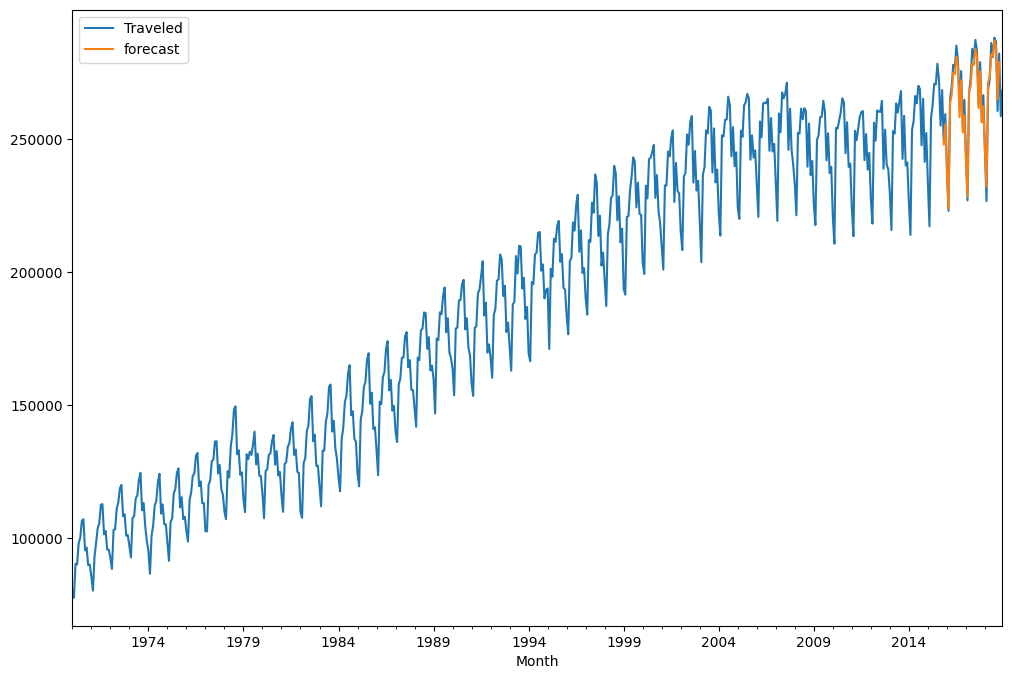

In [40]:
df['forecast']=results.predict(start=550,end=585,dynamic=True)
df[['Traveled','forecast']].plot(figsize=(12,8))

STEP 6: NEXT 24 MONTH SALES FORECAST

In [43]:
import pandas as pd
dates=pd.date_range('2018-12-01',periods=24,freq='M')
offset=pd.DateOffset(days=1)
new_dates=dates+offset
print(new_dates)

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq=None)


C:\Users\Arnab\AppData\Local\Temp\ipykernel_6584\2378321959.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates=pd.date_range('2018-12-01',periods=24,freq='M')


In [44]:
future_dates_df=pd.DataFrame(index=new_dates,columns=df.columns)

In [45]:
combined_df=pd.concat([df,future_dates_df])

C:\Users\Arnab\AppData\Local\Temp\ipykernel_6584\1400843788.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df=pd.concat([df,future_dates_df])


In [48]:
print(combined_df)

            Traveled  Traveled First Difference  Seasonal First Difference  \
1970-01-01   80173.0                        NaN                        NaN   
1970-02-01   77442.0                    -2731.0                        NaN   
1970-03-01   90223.0                    12781.0                        NaN   
1970-04-01   89956.0                     -267.0                        NaN   
1970-05-01   97972.0                     8016.0                        NaN   
...              ...                        ...                        ...   
2020-08-01       NaN                        NaN                        NaN   
2020-09-01       NaN                        NaN                        NaN   
2020-10-01       NaN                        NaN                        NaN   
2020-11-01       NaN                        NaN                        NaN   
2020-12-01       NaN                        NaN                        NaN   

                 forecast  
1970-01-01            NaN  
1970-02

<Axes: >

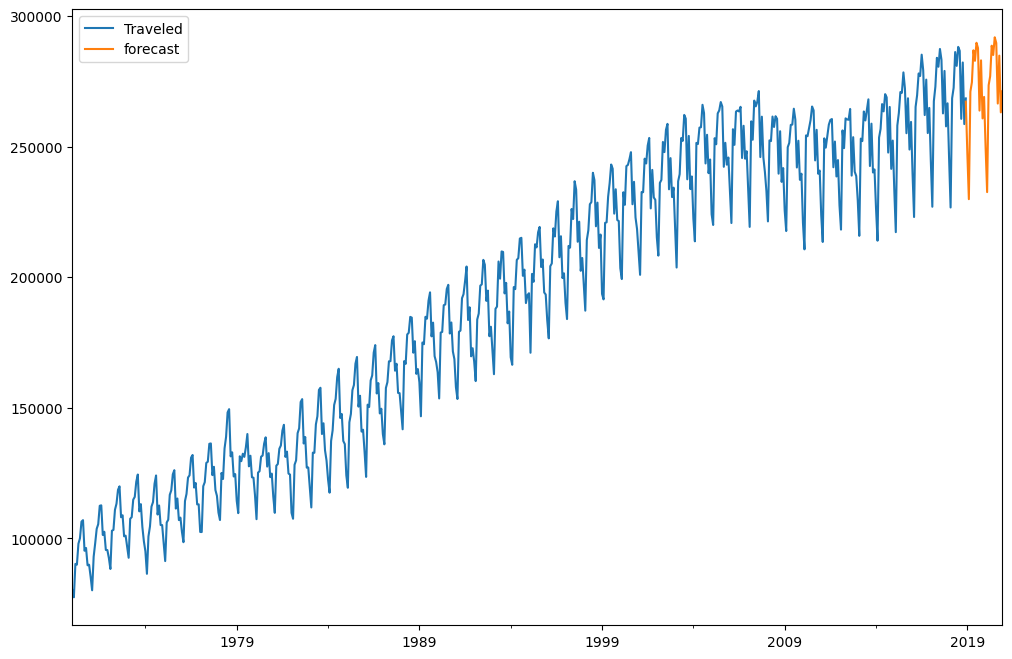

In [47]:
combined_df['forecast']=results.predict(start=587,end=611,dynamic=True)
combined_df[['Traveled','forecast']].plot(figsize=(12,8))